# Visual Weather Systems Using CNN

## This Script Contains the following:
01. Importing Files and Libraries
2. Building CNN
3. Predicting the Type of Weather

## 01. Importing Files and Libraries

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Dense, Input
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [181]:
#download the weather images and put them in a directory
path = r'/Users/niravbariya/Documents/Data Science/CareerFoundry/Machine Learning Specialization/Achievement 1 & 2/02 Data Sets/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', '.DS_Store', 'Shine', 'Sunrise']


In [292]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=15,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=15,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


## 02. Building CNN

In [293]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [294]:
#compile and run the model
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 36, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size)

Epoch 1/36


/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.4848 - loss: 0.1529 - val_accuracy: 0.6762 - val_loss: 0.1130
Epoch 2/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4667 - loss: 0.1396 - val_accuracy: 0.6429 - val_loss: 0.1119
Epoch 3/36


/opt/anaconda3/envs/notebook/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-07-02 17:33:15.612677: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:33:15.668703: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.7213 - loss: 0.0871 - val_accuracy: 0.7048 - val_loss: 0.1012
Epoch 4/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.8000 - loss: 0.0843 - val_accuracy: 0.7857 - val_loss: 0.0551
Epoch 5/36


2024-07-02 17:33:29.927408: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:33:29.979531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 0.7780 - loss: 0.0772 - val_accuracy: 0.7571 - val_loss: 0.0903
Epoch 6/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.6667 - loss: 0.1280 - val_accuracy: 0.6429 - val_loss: 0.1311
Epoch 7/36


2024-07-02 17:33:44.181037: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:33:44.235154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 0.7888 - loss: 0.0769 - val_accuracy: 0.7667 - val_loss: 0.0864
Epoch 8/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9333 - loss: 0.0352 - val_accuracy: 0.6429 - val_loss: 0.1406
Epoch 9/36


2024-07-02 17:33:58.450345: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:33:58.507748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 230ms/step - accuracy: 0.8553 - loss: 0.0520 - val_accuracy: 0.8333 - val_loss: 0.0698
Epoch 10/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.7333 - loss: 0.0719 - val_accuracy: 0.6429 - val_loss: 0.0954
Epoch 11/36


2024-07-02 17:34:12.846569: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:34:12.899659: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.8731 - loss: 0.0469 - val_accuracy: 0.8048 - val_loss: 0.0686
Epoch 12/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.8667 - loss: 0.0403 - val_accuracy: 0.8571 - val_loss: 0.0508
Epoch 13/36


2024-07-02 17:34:26.904580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:34:26.958872: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.8794 - loss: 0.0455 - val_accuracy: 0.7619 - val_loss: 0.0879
Epoch 14/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8667 - loss: 0.0694 - val_accuracy: 0.7857 - val_loss: 0.1010
Epoch 15/36


2024-07-02 17:34:41.075720: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:34:41.133513: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 0.8927 - loss: 0.0399 - val_accuracy: 0.8571 - val_loss: 0.0535
Epoch 16/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.9333 - loss: 0.0173 - val_accuracy: 0.8571 - val_loss: 0.0388
Epoch 17/36


2024-07-02 17:34:55.312776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:34:55.368228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 230ms/step - accuracy: 0.8735 - loss: 0.0467 - val_accuracy: 0.7762 - val_loss: 0.0890
Epoch 18/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.9333 - loss: 0.0377 - val_accuracy: 0.8571 - val_loss: 0.0283
Epoch 19/36


2024-07-02 17:35:09.692568: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:35:09.747104: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 232ms/step - accuracy: 0.9156 - loss: 0.0353 - val_accuracy: 0.8429 - val_loss: 0.0594
Epoch 20/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.9333 - loss: 0.0333 - val_accuracy: 0.7857 - val_loss: 0.0952
Epoch 21/36


2024-07-02 17:35:24.249314: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:35:24.302304: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 230ms/step - accuracy: 0.8786 - loss: 0.0484 - val_accuracy: 0.8381 - val_loss: 0.0593
Epoch 22/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.8000 - loss: 0.0644 - val_accuracy: 0.9286 - val_loss: 0.0457
Epoch 23/36


2024-07-02 17:35:38.551660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:35:38.605283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 347ms/step - accuracy: 0.9221 - loss: 0.0352 - val_accuracy: 0.7095 - val_loss: 0.1236
Epoch 24/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.7333 - loss: 0.1074 - val_accuracy: 0.7857 - val_loss: 0.0536
Epoch 25/36


2024-07-02 17:35:59.715091: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:35:59.769208: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.8249 - loss: 0.0676 - val_accuracy: 0.8476 - val_loss: 0.0600
Epoch 26/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.8667 - loss: 0.0487 - val_accuracy: 0.7857 - val_loss: 0.0880
Epoch 27/36


2024-07-02 17:36:13.906380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:36:13.961204: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 230ms/step - accuracy: 0.8877 - loss: 0.0425 - val_accuracy: 0.8000 - val_loss: 0.0758
Epoch 28/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.6429 - val_loss: 0.1217
Epoch 29/36


2024-07-02 17:36:28.296492: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:36:28.351507: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 231ms/step - accuracy: 0.9153 - loss: 0.0339 - val_accuracy: 0.8571 - val_loss: 0.0536
Epoch 30/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.9333 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 0.0173
Epoch 31/36


2024-07-02 17:36:42.641544: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:36:42.696774: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 234ms/step - accuracy: 0.9113 - loss: 0.0363 - val_accuracy: 0.8476 - val_loss: 0.0606
Epoch 32/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.9333 - loss: 0.0174 - val_accuracy: 0.9286 - val_loss: 0.0348
Epoch 33/36


2024-07-02 17:36:57.189499: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:36:57.243629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 231ms/step - accuracy: 0.9407 - loss: 0.0236 - val_accuracy: 0.8381 - val_loss: 0.0641
Epoch 34/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.9333 - loss: 0.0422 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 35/36


2024-07-02 17:37:11.663517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:37:11.718389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 232ms/step - accuracy: 0.9265 - loss: 0.0289 - val_accuracy: 0.8571 - val_loss: 0.0550
Epoch 36/36
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9333 - loss: 0.0159 - val_accuracy: 0.8571 - val_loss: 0.0549


2024-07-02 17:37:26.105008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-02 17:37:26.161003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [295]:
results = pd.DataFrame(model.history.history)

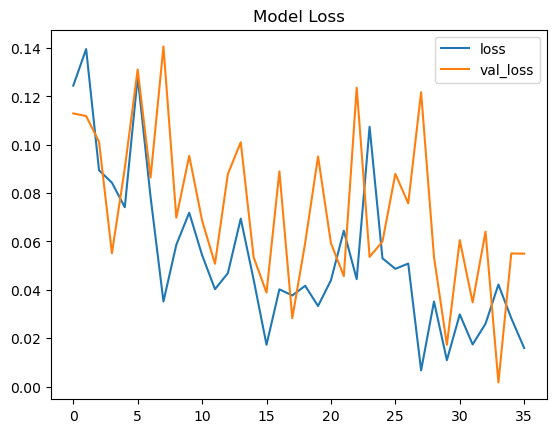

In [296]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

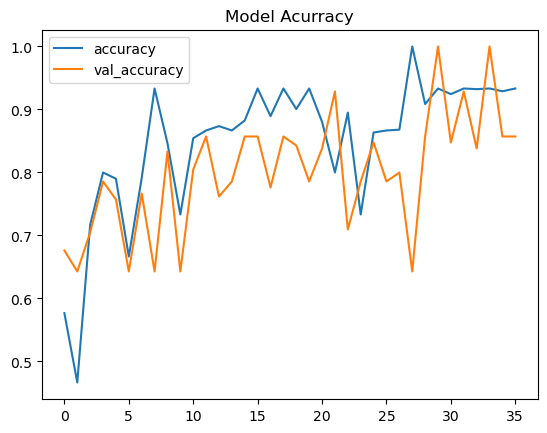

In [297]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [298]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9333333373069763, Val_Accuracy: 0.8571428656578064
Loss: 0.01593986339867115, Val_Loss: 0.054949283599853516


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


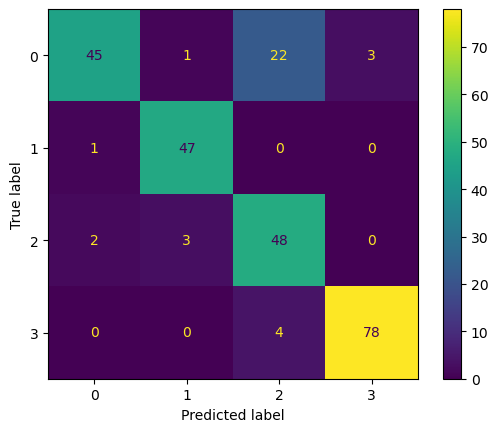

In [299]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 16 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## 03. Predicting the Type of Weather

In [1]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


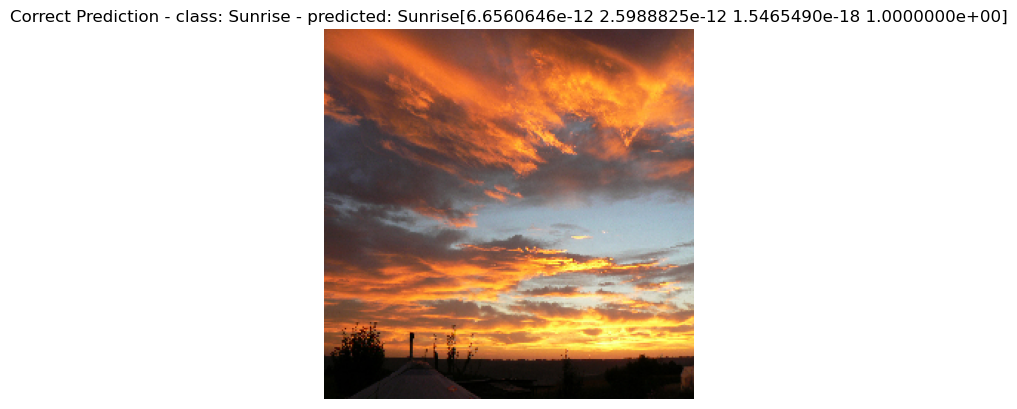

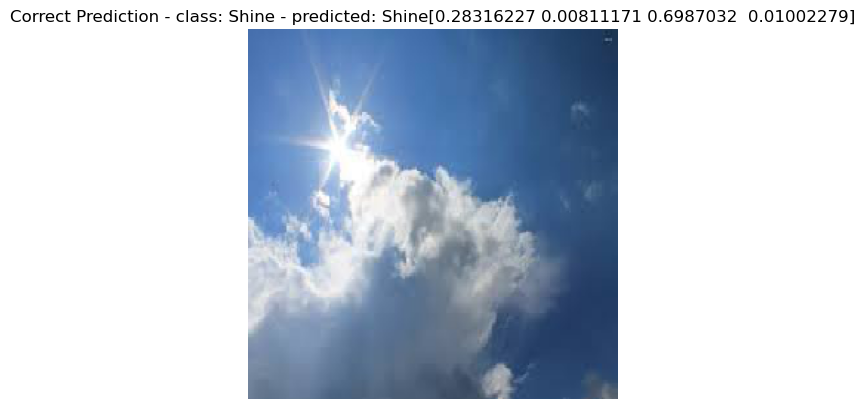

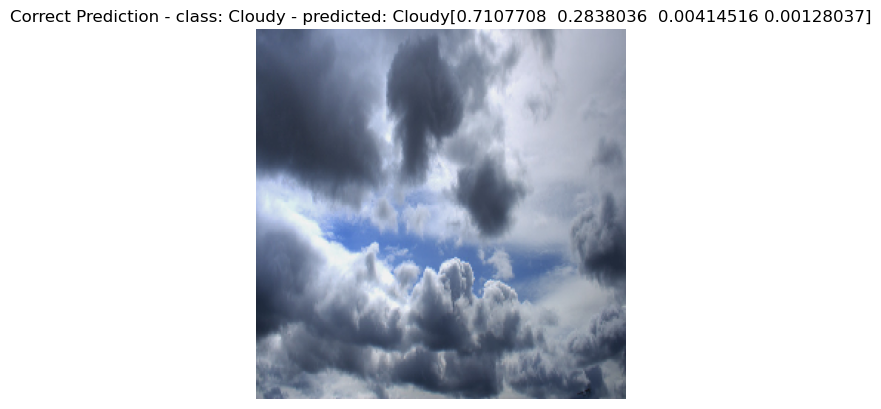

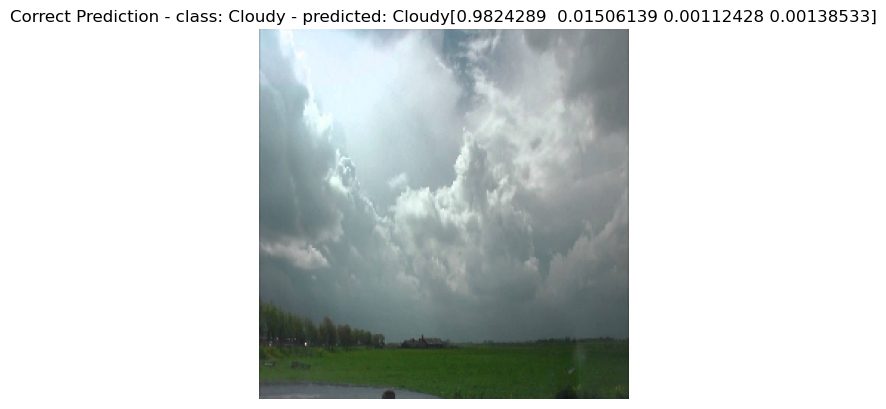

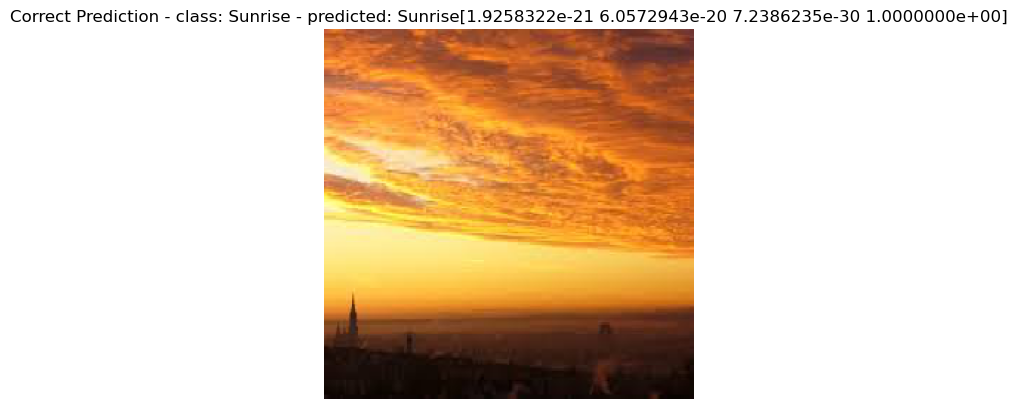

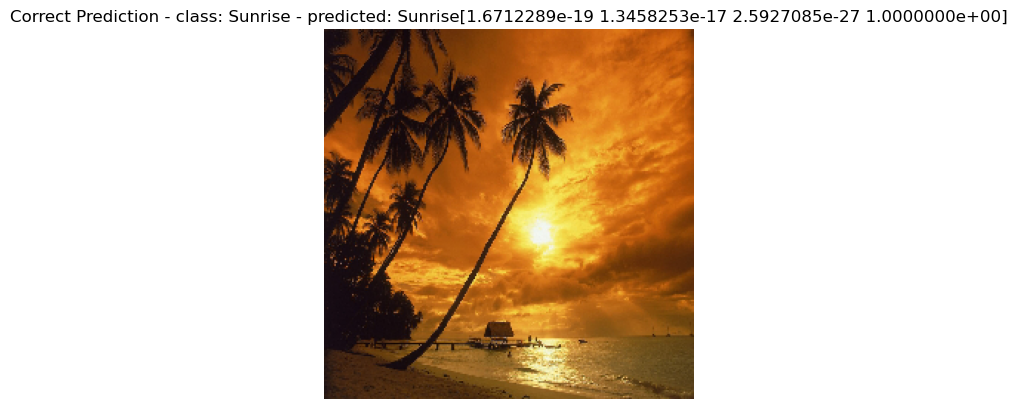

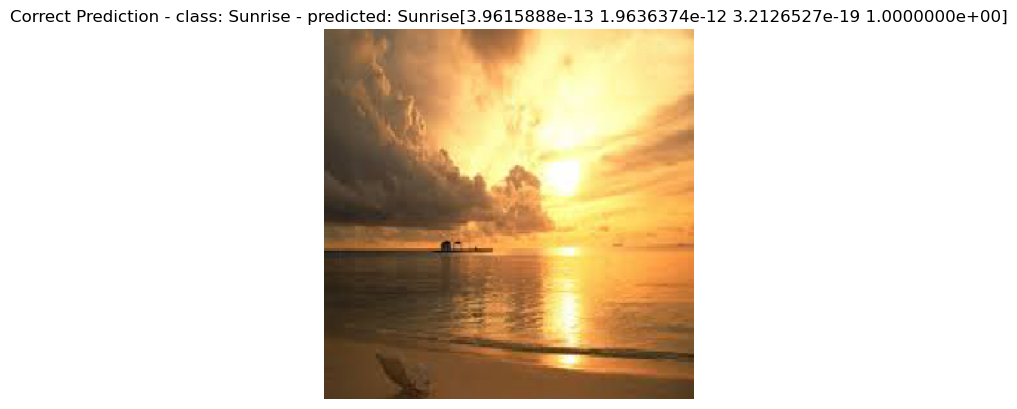

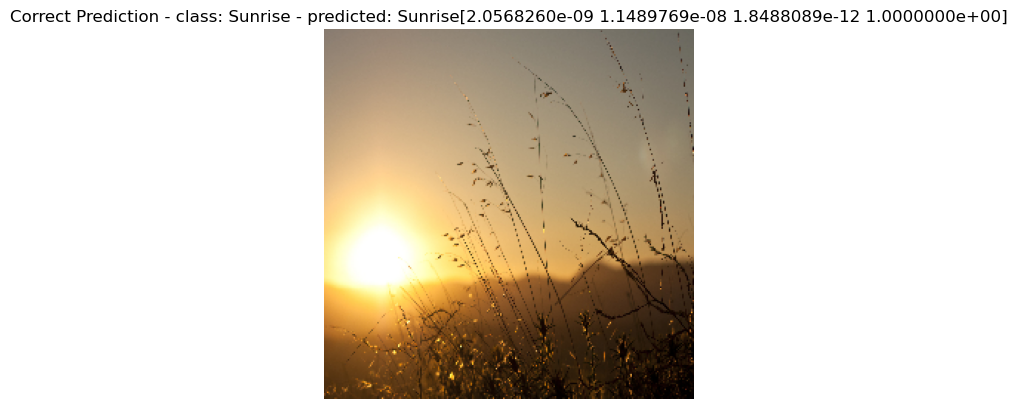

In [301]:
predict_one(model, 8) #<--you can show multiple pictures with this command. Just fill in the number you want to see.